<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Basket Analysis using Apriori Algorithm

<img src = "https://raw.githubusercontent.com/babukanagaraj/DataScience/master/MachineLearning/BasketAnalysis/images/SuperMarket.jpg"> </br>

Any Super Market should strategize their business plan efficiently in order to grow their business thus maximizing revenue and profits. Basket analysis plays a prominent role in order to understand their sale and the items that are popular in their store.

## Table of Contents

1. [Introduction](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading data](#section3)<br>
   - 3.1 [Description of the Dataset](#section301)<br>
4. [Analyzing data and creating new features](#section4)<br>
5. [Data Observation post data processing](#section5)<br>
6. [Explanatory Data Analysis](#section6)<br>
   - 6.1 [Top 10 transactions](#section601)<br>
   - 6.2 [Top 10 items sold](#section602)<br>
7. [Applying Apriori Algorithm](#section7)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Problem Statement

Understand the **sale transactions and find the items/itsemset** that are very popular or leading the chart sale so that they can be grouped together or placed in an adjacent shelf thus maximizing the chances of those items getting sold together.

<a id=section2></a>
## 2. Importing Packages

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8
rcParams['font.size'] = 15

pd.set_option('display.float_format', lambda x: '%f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id=section3></a>
## 3. Loading data

In [2]:
#Load grocery data
tx_data = pd.read_csv("C:/Users/Babu Kanagaraj/PythonProgrammingCode/ML-Projects/Grocery/groceries.csv",header = None, sep = '\t')
tx_data.head(10)

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
5,"whole milk,butter,yogurt,rice,abrasive cleaner"
6,rolls/buns
7,"other vegetables,UHT-milk,rolls/buns,bottled b..."
8,pot plants
9,"whole milk,cereals"


In [3]:
#Rename the column name 0 to Items
tx_data.rename(columns = {0: 'Items'}, inplace = True)
tx_data.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [4]:
tx_data.shape

(9835, 1)

<a id=section301></a>
### 3.1 Description of the Dataset

- This dataset provides details on the **items that were sold** for each sale transactions in the Super Market. Each row represents one transaction.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Items                          | Item names that were sold in that transaction.                                             | 


<a id=section4></a>
## 4. Analyzing data and creating new features

In [5]:
#Create new columns 'Txn No' and 'No of Items in Txn'
tx_data['Txn No'] = tx_data.index + 1
tx_data['Txn No'] = tx_data['Txn No'].apply(lambda x: 'T' + str(x))
tx_data['No of Items in Txn'] = tx_data['Items'].apply(lambda x: len(x.split(',')))
tx_data.head()

,Items,Txn No,No of Items in Txn
0,"citrus fruit,semi-finished bread,margarine,rea...",T1,4
1,"tropical fruit,yogurt,coffee",T2,3
2,whole milk,T3,1
3,"pip fruit,yogurt,cream cheese ,meat spreads",T4,4
4,"other vegetables,whole milk,condensed milk,lon...",T5,4


<a id=section5></a>
## 5. Data Observation post data processing

In [6]:
#Identify the number of unique items
itemSet = set()
for i in range(0,len(tx_data['Items'])):
    for j in range(0,len(tx_data['Items'][i].split(','))):
        itemSet.add(tx_data['Items'][i].split(',')[j])
len(itemSet)

169

- There are total of **169** unique items in the dataset.

In [7]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Items               9835 non-null   object
 1   Txn No              9835 non-null   object
 2   No of Items in Txn  9835 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 230.6+ KB


- ```info``` function gives us the following insights into the dataframe:
    - There are total of **9835** rows and **3** columns in the dataframe.
    - Columns are of both **numeric** and **categorical** datatype.
    - There are **0 missing** values in the data.

<a id=section6></a>
## 6. Explanatory Data Analysis

<a id=section601></a>
### 6.1 Top 10 transactions

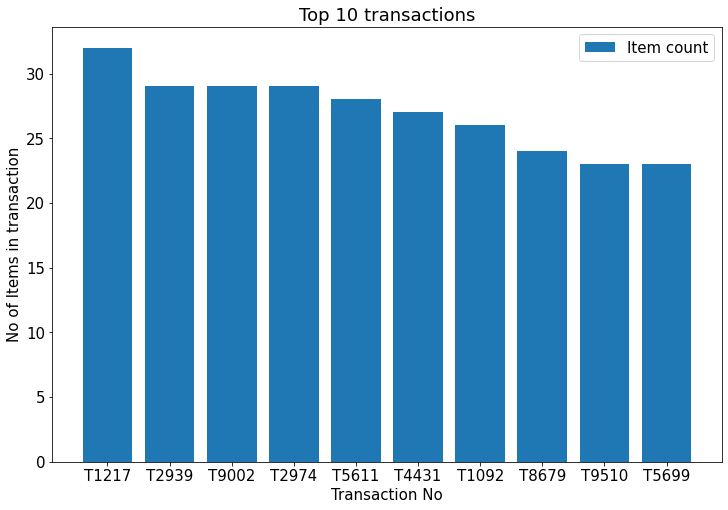

In [8]:
top_10_txn = tx_data[['Txn No','No of Items in Txn']].sort_values(by='No of Items in Txn',ascending=False).iloc[:10]
plt.xlabel('Transaction No')
plt.ylabel('No of Items in transaction')
plt.title('Top 10 transactions')
plt.bar(top_10_txn['Txn No'],top_10_txn['No of Items in Txn'], label = 'Item count')
plt.legend()

- 32 is the maximum number of items that were sold in a single transaction.

<a id=section602></a>
### 6.2 Top 10 items sold

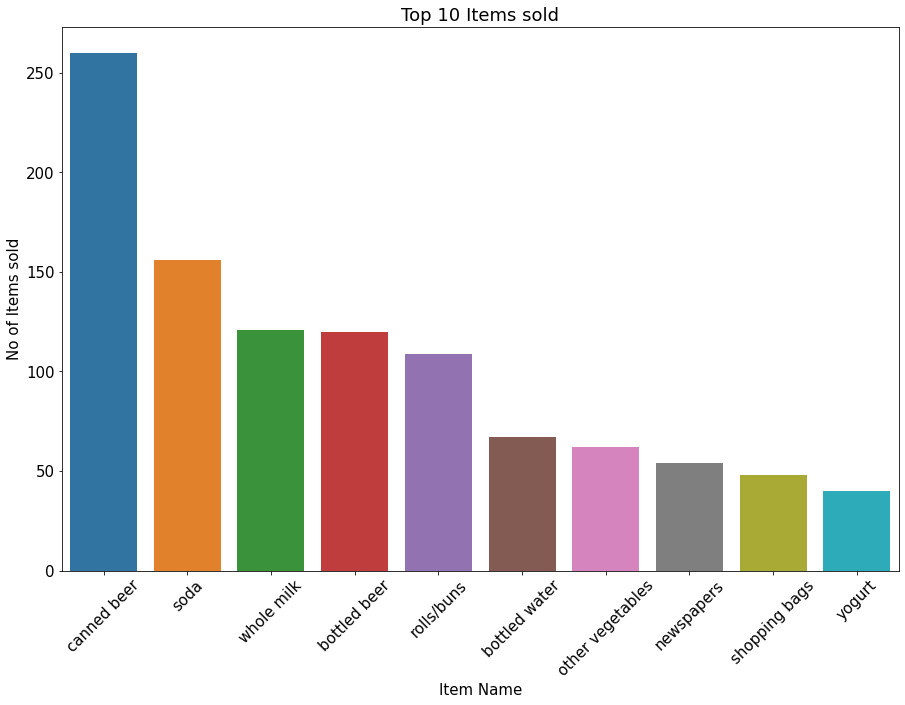

In [9]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 45)
plt.title('Top 10 Items sold')
ax = sns.countplot(x = tx_data['Items'], data = tx_data, order = tx_data['Items'].value_counts().iloc[:10].index)
ax.set(xlabel='Item Name', ylabel='No of Items sold')
plt.show()

- The graph above shows the top 10 items sold at Super Market and **canned beer** tops the list. 

<a id=section7></a>
## 7. Applying Apriori Algorithm

In [10]:
#Forming the data as per the format required by algorithm
data_1 = tx_data
data_1.set_index('Txn No',inplace=True)

data_3 = pd.DataFrame(index = data_1.index, columns = itemSet)
data_3.fillna(0,inplace=True)

data_4 = pd.merge(data_1,data_3,how='inner',on='Txn No')
data_4.head()

,Items,No of Items in Txn,processed cheese,red/blush wine,waffles,finished products,skin care,instant coffee,kitchen utensil,hamburger meat,hair spray,spices,specialty chocolate,pork,chewing gum,whipped/sour cream,sauces,beef,canned beer,roll products,baby cosmetics,citrus fruit,dog food,sausage,salt,rum,frozen fish,cleaner,mustard,white bread,tidbits,pickled vegetables,meat spreads,tropical fruit,dessert,organic products,long life bakery product,decalcifier,chocolate marshmallow,make up remover,liquor (appetizer),pastry,napkins,female sanitary products,root vegetables,canned fish,nuts/prunes,sugar,chicken,frozen dessert,ice cream,dishes,dish cleaner,sound storage medium,whisky,pip fruit,mayonnaise,salad dressing,flower soil/fertilizer,packaged fruit/vegetables,cream,white wine,sparkling wine,detergent,toilet cleaner,hard cheese,meat,beverages,kitchen towels,newspapers,tea,candles,baking powder,ketchup,chocolate,turkey,pet care,artif. sweetener,rubbing alcohol,cream cheese,fish,UHT-milk,cake bar,seasonal products,fruit/vegetable juice,semi-finished bread,softener,frozen potato products,honey,soap,frozen meals,rolls/buns,ready soups,soda,house keeping products,canned fruit,liver loaf,potato products,light bulbs,domestic eggs,candy,snack products,cooking chocolate,male cosmetics,bathroom cleaner,coffee,bags,flower (seeds),pasta,zwieback,liqueur,bottled water,condensed milk,bottled beer,hygiene articles,frankfurter,baby food,vinegar,yogurt,onions,cat food,preservation products,jam,other vegetables,organic sausage,grapes,ham,soft cheese,butter milk,salty snack,frozen vegetables,oil,sweet spreads,spread cheese,misc. beverages,berries,pudding powder,prosecco,specialty cheese,sliced cheese,brown bread,rice,frozen chicken,butter,canned vegetables,flour,whole milk,shopping bags,curd cheese,photo/film,syrup,frozen fruits,cookware,specialty vegetables,cocoa drinks,margarine,pot plants,brandy,dental care,cling film/bags,curd,cereals,Instant food products,herbs,nut snack,soups,specialty fat,specialty bar,popcorn,liquor,abrasive cleaner
Txn No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T1,"citrus fruit,semi-finished bread,margarine,rea...",4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T2,"tropical fruit,yogurt,coffee",3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T3,whole milk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T4,"pip fruit,yogurt,cream cheese ,meat spreads",4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T5,"other vegetables,whole milk,condensed milk,lon...",4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
#Creating/formulating the dataframe as per the algorithm requirement
for i in range(0,data_4.shape[0]):
    items = data_4['Items'].str.split(',')[i]
    for j in range(0,len(items)):
        existingValue = data_4[items[j]].loc[data_4.index[i]:data_4.index[i]]
        data_4[items[j]].loc[data_4.index[i]:data_4.index[i]] = existingValue[0] + 1
        
data = data_4.drop(columns = ['Items','No of Items in Txn'])
data.head()

,processed cheese,red/blush wine,waffles,finished products,skin care,instant coffee,kitchen utensil,hamburger meat,hair spray,spices,specialty chocolate,pork,chewing gum,whipped/sour cream,sauces,beef,canned beer,roll products,baby cosmetics,citrus fruit,dog food,sausage,salt,rum,frozen fish,cleaner,mustard,white bread,tidbits,pickled vegetables,meat spreads,tropical fruit,dessert,organic products,long life bakery product,decalcifier,chocolate marshmallow,make up remover,liquor (appetizer),pastry,napkins,female sanitary products,root vegetables,canned fish,nuts/prunes,sugar,chicken,frozen dessert,ice cream,dishes,dish cleaner,sound storage medium,whisky,pip fruit,mayonnaise,salad dressing,flower soil/fertilizer,packaged fruit/vegetables,cream,white wine,sparkling wine,detergent,toilet cleaner,hard cheese,meat,beverages,kitchen towels,newspapers,tea,candles,baking powder,ketchup,chocolate,turkey,pet care,artif. sweetener,rubbing alcohol,cream cheese,fish,UHT-milk,cake bar,seasonal products,fruit/vegetable juice,semi-finished bread,softener,frozen potato products,honey,soap,frozen meals,rolls/buns,ready soups,soda,house keeping products,canned fruit,liver loaf,potato products,light bulbs,domestic eggs,candy,snack products,cooking chocolate,male cosmetics,bathroom cleaner,coffee,bags,flower (seeds),pasta,zwieback,liqueur,bottled water,condensed milk,bottled beer,hygiene articles,frankfurter,baby food,vinegar,yogurt,onions,cat food,preservation products,jam,other vegetables,organic sausage,grapes,ham,soft cheese,butter milk,salty snack,frozen vegetables,oil,sweet spreads,spread cheese,misc. beverages,berries,pudding powder,prosecco,specialty cheese,sliced cheese,brown bread,rice,frozen chicken,butter,canned vegetables,flour,whole milk,shopping bags,curd cheese,photo/film,syrup,frozen fruits,cookware,specialty vegetables,cocoa drinks,margarine,pot plants,brandy,dental care,cling film/bags,curd,cereals,Instant food products,herbs,nut snack,soups,specialty fat,specialty bar,popcorn,liquor,abrasive cleaner
Txn No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#Label encode all the columns (itemSet)
def encode_units(x):
    if x <=  0:
        return 0
    if x >=  1:
        return 1
data  =  data.applymap(encode_units)
data.head()

,processed cheese,red/blush wine,waffles,finished products,skin care,instant coffee,kitchen utensil,hamburger meat,hair spray,spices,specialty chocolate,pork,chewing gum,whipped/sour cream,sauces,beef,canned beer,roll products,baby cosmetics,citrus fruit,dog food,sausage,salt,rum,frozen fish,cleaner,mustard,white bread,tidbits,pickled vegetables,meat spreads,tropical fruit,dessert,organic products,long life bakery product,decalcifier,chocolate marshmallow,make up remover,liquor (appetizer),pastry,napkins,female sanitary products,root vegetables,canned fish,nuts/prunes,sugar,chicken,frozen dessert,ice cream,dishes,dish cleaner,sound storage medium,whisky,pip fruit,mayonnaise,salad dressing,flower soil/fertilizer,packaged fruit/vegetables,cream,white wine,sparkling wine,detergent,toilet cleaner,hard cheese,meat,beverages,kitchen towels,newspapers,tea,candles,baking powder,ketchup,chocolate,turkey,pet care,artif. sweetener,rubbing alcohol,cream cheese,fish,UHT-milk,cake bar,seasonal products,fruit/vegetable juice,semi-finished bread,softener,frozen potato products,honey,soap,frozen meals,rolls/buns,ready soups,soda,house keeping products,canned fruit,liver loaf,potato products,light bulbs,domestic eggs,candy,snack products,cooking chocolate,male cosmetics,bathroom cleaner,coffee,bags,flower (seeds),pasta,zwieback,liqueur,bottled water,condensed milk,bottled beer,hygiene articles,frankfurter,baby food,vinegar,yogurt,onions,cat food,preservation products,jam,other vegetables,organic sausage,grapes,ham,soft cheese,butter milk,salty snack,frozen vegetables,oil,sweet spreads,spread cheese,misc. beverages,berries,pudding powder,prosecco,specialty cheese,sliced cheese,brown bread,rice,frozen chicken,butter,canned vegetables,flour,whole milk,shopping bags,curd cheese,photo/film,syrup,frozen fruits,cookware,specialty vegetables,cocoa drinks,margarine,pot plants,brandy,dental care,cling film/bags,curd,cereals,Instant food products,herbs,nut snack,soups,specialty fat,specialty bar,popcorn,liquor,abrasive cleaner
Txn No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
T1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
T5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Using **min_support 0.01** as threshold

In [13]:
frequent_itemsets  =  apriori(data, min_support = 0.01, use_colnames = True)
frequent_itemsets.sort_values(by = 'support',ascending = False)

,support,itemsets
79,0.255516,(whole milk)
63,0.193493,(other vegetables)
48,0.183935,(rolls/buns)
49,0.174377,(soda)
60,0.139502,(yogurt)
55,0.110524,(bottled water)
23,0.108998,(root vegetables)
18,0.104931,(tropical fruit)
80,0.098526,(shopping bags)
12,0.093950,(sausage)


- Out of all transactions **Whole milk** is the frequent item sold with maximum support of **0.255516**

In [14]:
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending  =  False, inplace  =  True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
431,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
455,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
588,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
593,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
461,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
515,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
569,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694
419,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
504,"(rolls/buns, root vegetables)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804
528,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003


- The table above shows top 10 confidence values. The inference is that out of all transactions that contain **'citrus fruit and root vegetables', 58.6 % of them contain 'other vegetables'**.

- 'other vegetables' and 'whole milk' are frequent consequents for different antecedents.

In [15]:
rules  =  association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.sort_values('lift', ascending  =  False, inplace  =  True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
590,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
587,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
430,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
435,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
414,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
415,(whipped/sour cream),"(other vegetables, yogurt)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
454,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
459,(root vegetables),"(other vegetables, tropical fruit)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
36,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
37,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366


In [19]:
unique_lift = rules.drop_duplicates(subset = 'lift', keep = 'first')
unique_lift.sort_values('lift', ascending  =  False, inplace  =  True)
unique_lift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
590,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
430,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
414,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
415,(whipped/sour cream),"(other vegetables, yogurt)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
454,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
36,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
434,(other vegetables),"(citrus fruit, root vegetables)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941
455,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
520,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
594,"(whole milk, other vegetables)",(butter),0.074835,0.055414,0.011490,0.153533,2.770630,0.007343,1.115915


- The table above shows top 10 lift values. The inference is that **'yogurt and whole milk'** are 3.37 times likely to be bought by the customer along with **curd**. 

Itemsets where the **confidence** is **greater** than or equal to **0.55**

In [20]:
rules = rules[rules['confidence']>= 0.55]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
431,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
455,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
588,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
593,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
461,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553


Observations:
- **57%** of the customers who bought **tropical fruit and root vegetables** or **butter and other vegetables** also bought **whole milk**.

- **58%** of the customers,
    - who bought **tropical fruit and root vegetables** also bought **other vegetables**.
    - who bought **citrus fruit and root vegetables** also bought **other vegetables**.
    - who bought **curd and yogurt** also bought **whole milk**.

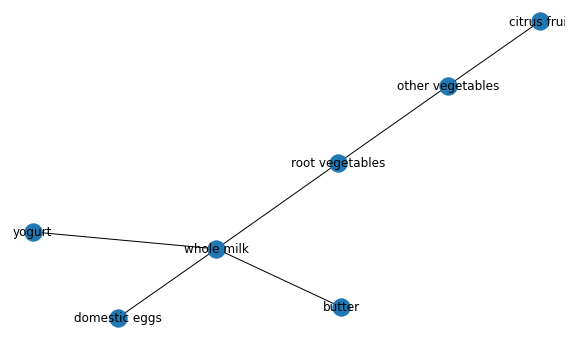

In [21]:
import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

<a id=section8></a>
## 8. Conclusion

- **Whole Milk** is the top selling item in the Supermarket and it shows association with the below items,
    - Citrus fruit
    - Root vegetables
    - Other vegetables
    - Yogurt
    - Butter
    - Domestic eggs
    
- Supermarket can strategize and increase the sale by clubbing the products (Whole milk and the aforementioned items) and introducing **promotional discounts**.

- Also Supermarket can place the Whole Milk and its associated items in adjacent shelves thus enticing the customers to buy them together.